<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,67.438595,-0.045271,77.393324,77.468698,-0.075375
1,0.0,1.0,26.388063,1.047955,37.436018,36.344192,1.091826
2,0.0,2.0,61.016701,0.000527,71.017228,71.035232,-0.018004
3,0.0,3.0,21.594724,0.256842,31.851566,31.542215,0.309351
4,0.0,4.0,36.457840,0.124512,46.582351,46.432115,0.150237
...,...,...,...,...,...,...,...
29995,999.0,25.0,96.056280,-0.477764,105.578517,105.856995,-0.278478
29996,999.0,26.0,37.602978,-0.373227,47.229752,47.587219,-0.357467
29997,999.0,27.0,89.073667,-0.098287,98.975380,98.896305,0.079075
29998,999.0,28.0,28.990977,0.600098,39.591075,39.002257,0.588818


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,67.438595,-0.045271,77.393324,77.468698,-0.075375
1,0.0,1.0,26.388063,1.047955,37.436018,36.344192,1.091826
2,0.0,2.0,61.016701,0.000527,71.017228,71.035232,-0.018004
3,0.0,3.0,21.594724,0.256842,31.851566,31.542215,0.309351
4,0.0,4.0,36.457840,0.124512,46.582351,46.432115,0.150237
...,...,...,...,...,...,...,...
29995,999.0,25.0,96.056280,-0.477764,105.578517,105.856995,-0.278478
29996,999.0,26.0,37.602978,-0.373227,47.229752,47.587219,-0.357467
29997,999.0,27.0,89.073667,-0.098287,98.975380,98.896305,0.079075
29998,999.0,28.0,28.990977,0.600098,39.591075,39.002257,0.588818


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    67.438595 -0.045271   77.393324   77.468698 -0.075375
      1.0    26.388063  1.047955   37.436018   36.344192  1.091826
      2.0    61.016701  0.000527   71.017228   71.035232 -0.018004
      3.0    21.594724  0.256842   31.851566   31.542215  0.309351
      4.0    36.457840  0.124512   46.582351   46.432115  0.150237
...                ...       ...         ...         ...       ...
999.0 25.0   96.056280 -0.477764  105.578517  105.856995 -0.278478
      26.0   37.602978 -0.373227   47.229752   47.587219 -0.357467
      27.0   89.073667 -0.098287   98.975380   98.896305  0.079075
      28.0   28.990977  0.600098   39.591075   39.002257  0.588818
      29.0   68.474565 -0.492564   77.982001   78.361878 -0.379877

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    67.438595 -0.045271   77.393324   77.468698 -0.075375
      1.0    26.388063  1.047955   37.436018   36.344192  1.091826
      2.0    61.016701  0.000527   71.017228   71.035232 -0.018004
      3.0    21.594724  0.256842   31.851566   31.542215  0.309351
      4.0    36.457840  0.124512   46.582351   46.432115  0.150237
...                ...       ...         ...         ...       ...
999.0 25.0   96.056280 -0.477764  105.578517  105.856995 -0.278478
      26.0   37.602978 -0.373227   47.229752   47.587219 -0.357467
      27.0   89.073667 -0.098287   98.975380   98.896305  0.079075
      28.0   28.990977  0.600098   39.591075   39.002257  0.588818
      29.0   68.474565 -0.492564   77.982001   78.361878 -0.379877

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,67.438595,-0.045271,77.393324,77.468698,-0.075375
1,0.0,1.0,26.388063,1.047955,37.436018,36.344192,1.091826
2,0.0,2.0,61.016701,0.000527,71.017228,71.035232,-0.018004
3,0.0,3.0,21.594724,0.256842,31.851566,31.542215,0.309351
4,0.0,4.0,36.457840,0.124512,46.582351,46.432115,0.150237
...,...,...,...,...,...,...,...
29995,999.0,25.0,96.056280,-0.477764,105.578517,105.856995,-0.278478
29996,999.0,26.0,37.602978,-0.373227,47.229752,47.587219,-0.357467
29997,999.0,27.0,89.073667,-0.098287,98.975380,98.896305,0.079075
29998,999.0,28.0,28.990977,0.600098,39.591075,39.002257,0.588818


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    67.438595 -0.045271   77.393324   77.468698 -0.075375
      1.0    26.388063  1.047955   37.436018   36.344192  1.091826
      2.0    61.016701  0.000527   71.017228   71.035232 -0.018004
      3.0    21.594724  0.256842   31.851566   31.542215  0.309351
      4.0    36.457840  0.124512   46.582351   46.432115  0.150237
...                ...       ...         ...         ...       ...
999.0 25.0   96.056280 -0.477764  105.578517  105.856995 -0.278478
      26.0   37.602978 -0.373227   47.229752   47.587219 -0.357467
      27.0   89.073667 -0.098287   98.975380   98.896305  0.079075
      28.0   28.990977  0.600098   39.591075   39.002257  0.588818
      29.0   68.474565 -0.492564   77.982001   78.361878 -0.379877

[30000 rows x 5 columns]

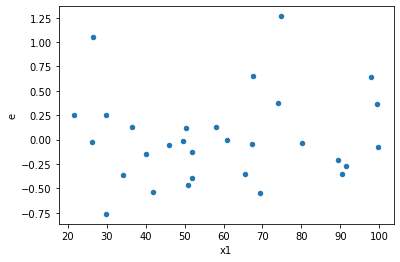

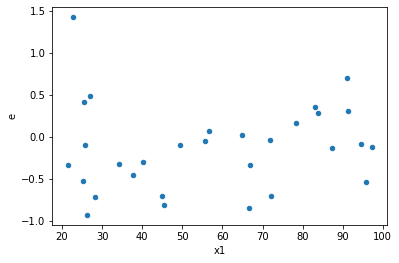

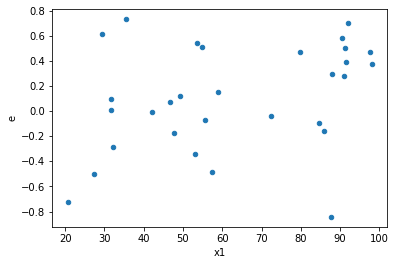

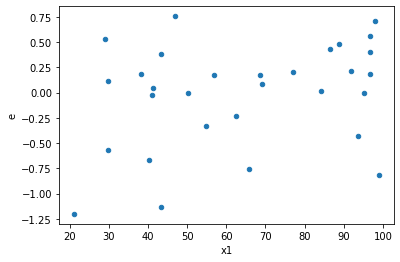

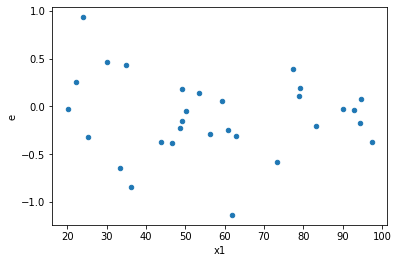

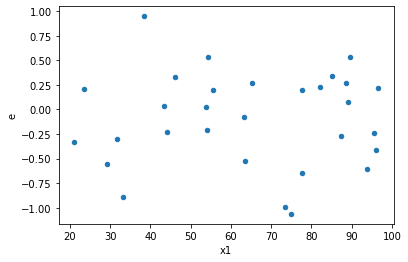

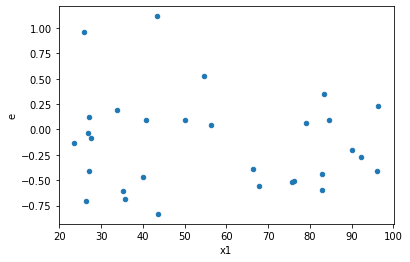

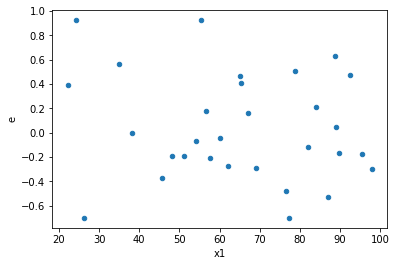

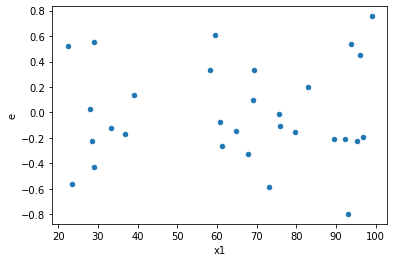

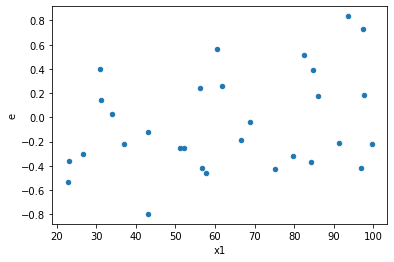

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,11.0,2.126886859815434,2.965197400220839,0.19335335089231218,0.2695634000200763,1.3941490994392394,0.5909476084755512,0.7045261957622244,0.2954738042377756,Reject001=1 : Homoscedasticity
8.0,11.0,11.0,1.4664397231046793,1.8621156496264517,0.1333127021004254,0.16928324087513197,1.2698207913272188,0.6989092883466728,0.6505453558266636,0.3494546441733364,Reject001=1 : Homoscedasticity
9.0,11.0,11.0,1.2029513269038368,2.1881459660232188,0.10935921153671244,0.19892236054756535,1.8189812979840854,0.3355762082535132,0.8322118958732434,0.1677881041267566,Reject001=1 : Homoscedasticity
10.0,11.0,11.0,2.344057757283312,3.268612818539062,0.21309615975302834,0.29714661986718743,1.3944250342735922,0.5907275528341231,0.7046362235829384,0.2953637764170616,Reject001=1 : Homoscedasticity
15.0,11.0,11.0,1.0454196178419617,1.4543456633067928,0.09503814707654197,0.13221324211879934,1.3911597204469615,0.59333693830618,0.70333153084691,0.29666846915309,Reject001=1 : Homoscedasticity
21.0,11.0,11.0,0.9008114559668101,1.670162386085037,0.08189195054243728,0.15183294418954882,1.8540643272487125,0.3205946462090763,0.8397026768954619,0.16029732310453815,Reject001=1 : Homoscedasticity
22.0,11.0,11.0,0.7798409570534514,1.920094584635802,0.07089463245940467,0.17455405314870928,2.4621617616631495,0.15054938865730194,0.924725305671349,0.07527469432865097,Reject001=1 : Homoscedasticity
24.0,11.0,11.0,1.3242895372573698,2.4727769981032295,0.12038995793248816,0.2247979089184754,1.8672480062210566,0.3151559105495678,0.8424220447252161,0.1575779552747839,Reject001=1 : Homoscedasticity
25.0,11.0,11.0,2.256114308322551,2.339362520378016,0.20510130075659558,0.21266932003436512,1.0368989335994065,0.9531607302627734,0.5234196348686133,0.4765803651313867,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,2.126886859815434,2.965197400220839,0.19335335089231218,0.2695634000200763,1.3941490994392394,0.5909476084755512,Reject001=1 : Homoscedasticity
1.0,11.0,11.0,3.9828781544622482,1.6380551073282936,0.36207983222384077,0.1489141006662085,0.41127422025026944,0.15613762707318185,Reject001=1 : Homoscedasticity
2.0,11.0,11.0,1.9047446363705542,1.7808307183333767,0.17315860330641403,0.1618937016666706,0.9349446032444052,0.9131723199265336,Reject001=1 : Homoscedasticity
3.0,11.0,11.0,3.8076074547893177,2.0133465754863105,0.3461461322535743,0.18303150686239186,0.5287694699078986,0.3055393706857947,Reject001=1 : Homoscedasticity
4.0,11.0,11.0,2.3347954366227555,1.4456098880082018,0.21225413060206869,0.13141908072801833,0.6191591200380507,0.43919296305238925,Reject001=1 : Homoscedasticity
5.0,11.0,11.0,2.416161455140039,1.6741944177410673,0.2196510413763672,0.1521994925219152,0.6929149598754906,0.5531268330083955,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,2.302856660457142,1.0376633403468132,0.20935060549610382,0.09433303094061939,0.4505983191072022,0.20189474708646482,Reject001=1 : Homoscedasticity
7.0,11.0,11.0,2.76483682876589,1.9809928111629822,0.2513488026150809,0.1800902555602711,0.7164953788781873,0.5897258536344528,Reject001=1 : Homoscedasticity
8.0,11.0,11.0,1.4664397231046793,1.8621156496264517,0.1333127021004254,0.16928324087513197,1.2698207913272188,0.6989092883466728,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      979
Reject001=0 : Heteroscedasticity     21
Name: Result_test, dtype: int64